Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total number of rows: 95970
Number of unique rows: 89264
Number of potential duplicates: 6706

Permutation Importance:
               feature  importance
9                  Gap    1.178275
7   Average True Range    0.444117
13          Prev Close    0.158255
11     Relative Volume    0.141233
14                Open    0.140441
17               Price    0.118251
18        Volume/Float    0.086952
8        All-Time High    0.059630
0           Market Cap    0.052838
1               Income    0.041550
6         Gross Margin    0.038959
3          Float Short    0.038445
5        Current Ratio    0.037225
4          Short Ratio    0.025871
12              Volume    0.025795
2         Shares Float    0.019968
16                 Low    0.019268
10      Average Volume    0.018319
15                High    0.010309


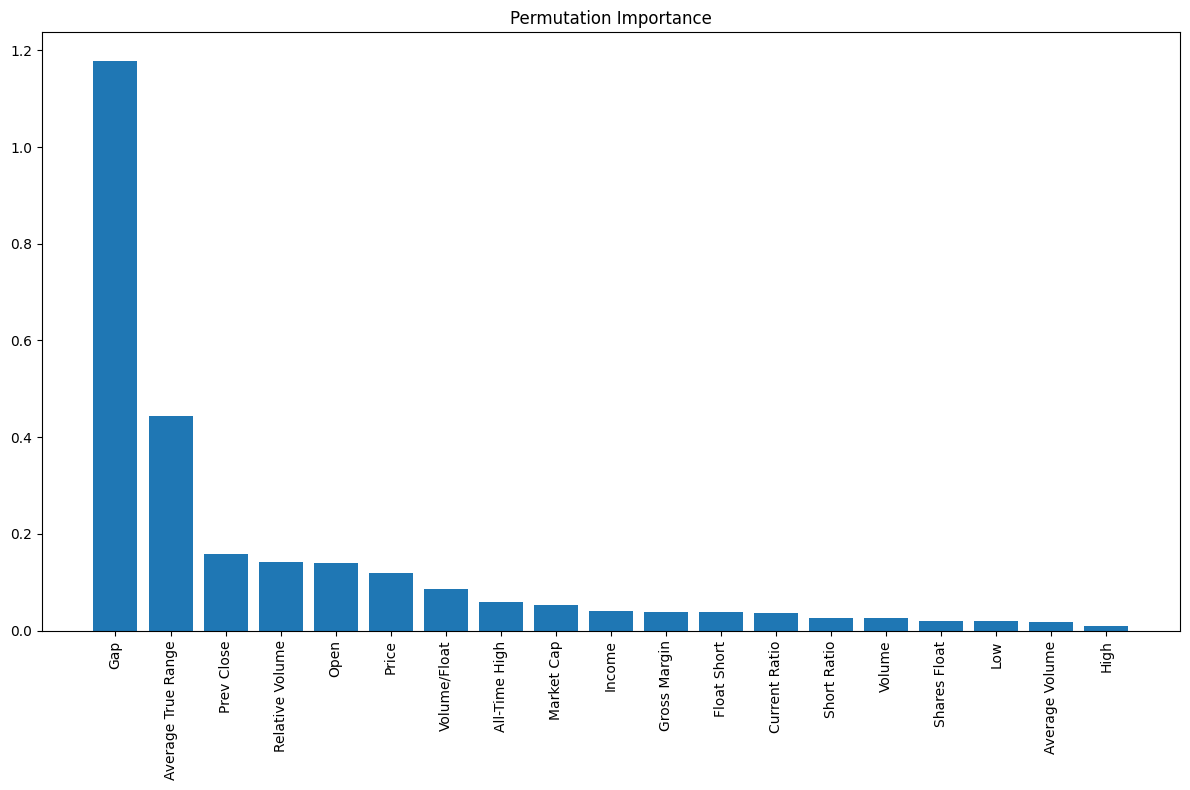


Built-in Feature Importances:
               feature  importance
9                  Gap    0.345611
18        Volume/Float    0.100586
7   Average True Range    0.098464
11     Relative Volume    0.066906
12              Volume    0.038781
8        All-Time High    0.036880
1               Income    0.035552
17               Price    0.033122
0           Market Cap    0.032943
5        Current Ratio    0.031510
3          Float Short    0.031200
6         Gross Margin    0.025976
4          Short Ratio    0.024186
2         Shares Float    0.021551
10      Average Volume    0.020636
13          Prev Close    0.015649
14                Open    0.014532
15                High    0.013101
16                 Low    0.012813


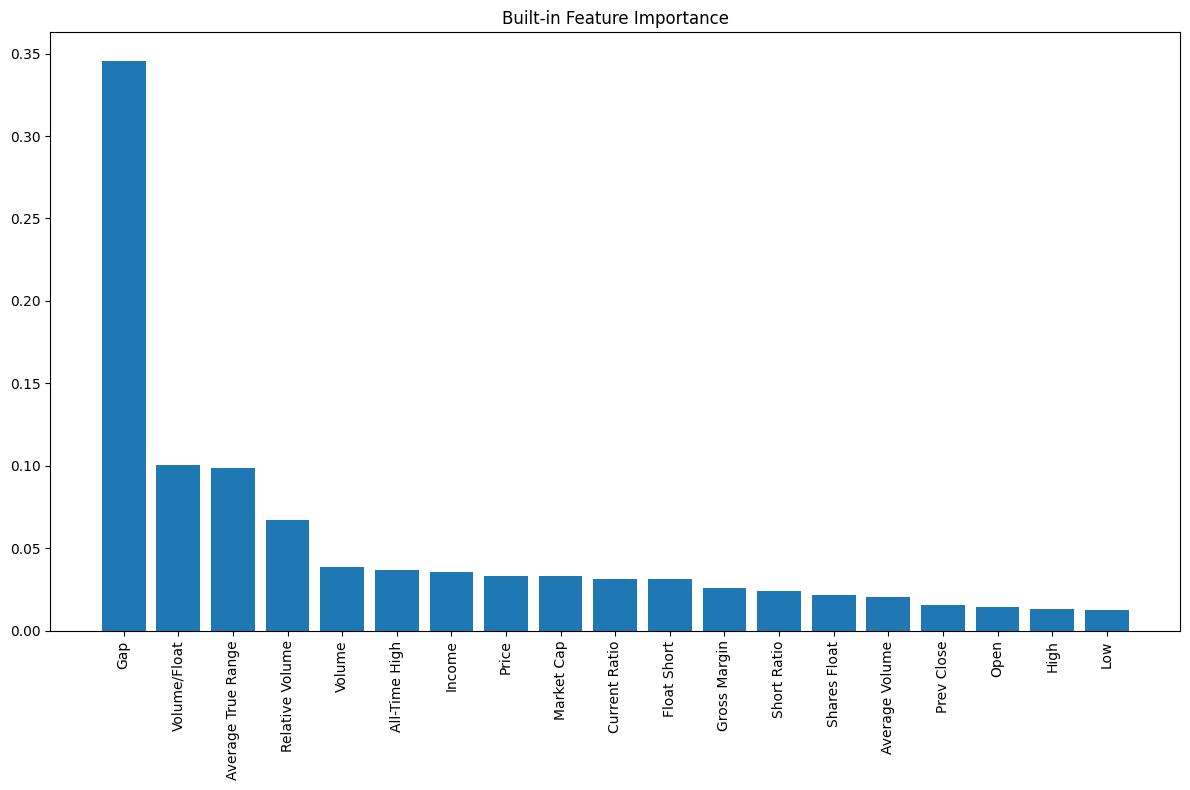

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from google.colab import drive
import glob

# Mount Google Drive
drive.mount('/content/drive')

# Function to process a single CSV file
def process_csv(file_path):
    df = pd.read_csv(file_path)
    # Convert percentage strings to floats
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = df[col].str.rstrip('%').astype('float') / 100.0
            except:
                pass
    return df

# Get all CSV files in the directory
csv_files = glob.glob('/content/drive/MyDrive/DS200Labs/CSVs/*.csv')

# Process all CSV files
all_data = []
for file in csv_files:
    df = process_csv(file)
    all_data.append(df)

# Combine all data
combined_data = pd.concat(all_data, ignore_index=True)

# Print information about the dataset
print(f"Total number of rows: {len(combined_data)}")
print(f"Number of unique rows: {combined_data.drop_duplicates().shape[0]}")
print(f"Number of potential duplicates: {len(combined_data) - combined_data.drop_duplicates().shape[0]}")

# Prepare features and target
feature_columns = ['Market Cap', 'Income', 'Shares Float','Float Short', 'Short Ratio', 'Current Ratio','Gross Margin','Average True Range','All-Time High','Gap', 'Average Volume',
                   'Relative Volume', 'Volume', 'Prev Close', 'Open', 'High', 'Low', 'Price']

# Ensure all feature columns are numeric
for col in feature_columns + ['Change']:
    if combined_data[col].dtype == 'object':
        combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce')

# Add new feature 'Volume/Float'
combined_data['Volume/Float'] = combined_data['Volume'] / combined_data['Shares Float']
feature_columns.append('Volume/Float')

# Remove rows where 'Change' (target variable) is NaN
combined_data = combined_data.dropna(subset=['Change'])

X = combined_data[feature_columns]
y = combined_data['Change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(rf, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create and sort feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': perm_importance.importances_mean
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Print feature importances
print("\nPermutation Importance:")
print(feature_importance)

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Permutation Importance')
plt.tight_layout()
plt.show()

# Additionally, let's look at the built-in feature importances
builtin_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf.feature_importances_
})
builtin_importance = builtin_importance.sort_values('importance', ascending=False)

print("\nBuilt-in Feature Importances:")
print(builtin_importance)

plt.figure(figsize=(12, 8))
plt.bar(builtin_importance['feature'], builtin_importance['importance'])
plt.xticks(rotation=90)
plt.title('Built-in Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Count NaN values
nan_count = np.isnan(y_train).sum()

# Count non-NaN values
non_nan_count = np.count_nonzero(~np.isnan(y_train))

# Total number of rows
total_rows = len(y_train)

print(f"Number of NaN values: {nan_count}")
print(f"Number of non-NaN values: {non_nan_count}")
print(f"Total number of rows: {total_rows}")
print(f"Percentage of NaN values: {nan_count/total_rows*100:.2f}%")

Number of NaN values: 136
Number of non-NaN values: 68933
Total number of rows: 69069
Percentage of NaN values: 0.20%



Gradient Boosting - Permutation Importance:
               feature  importance
7           Prev Close    1.360854
8                 Open    1.186412
3     Change from Open    0.463357
6               Volume    0.153758
5      Relative Volume    0.118738
12        Volume/Float    0.098668
10                 Low    0.067892
4       Average Volume    0.022950
1          Short Ratio    0.022832
11               Price    0.013095
2   Average True Range    0.007487
9                 High    0.006031
0         Shares Float    0.005295


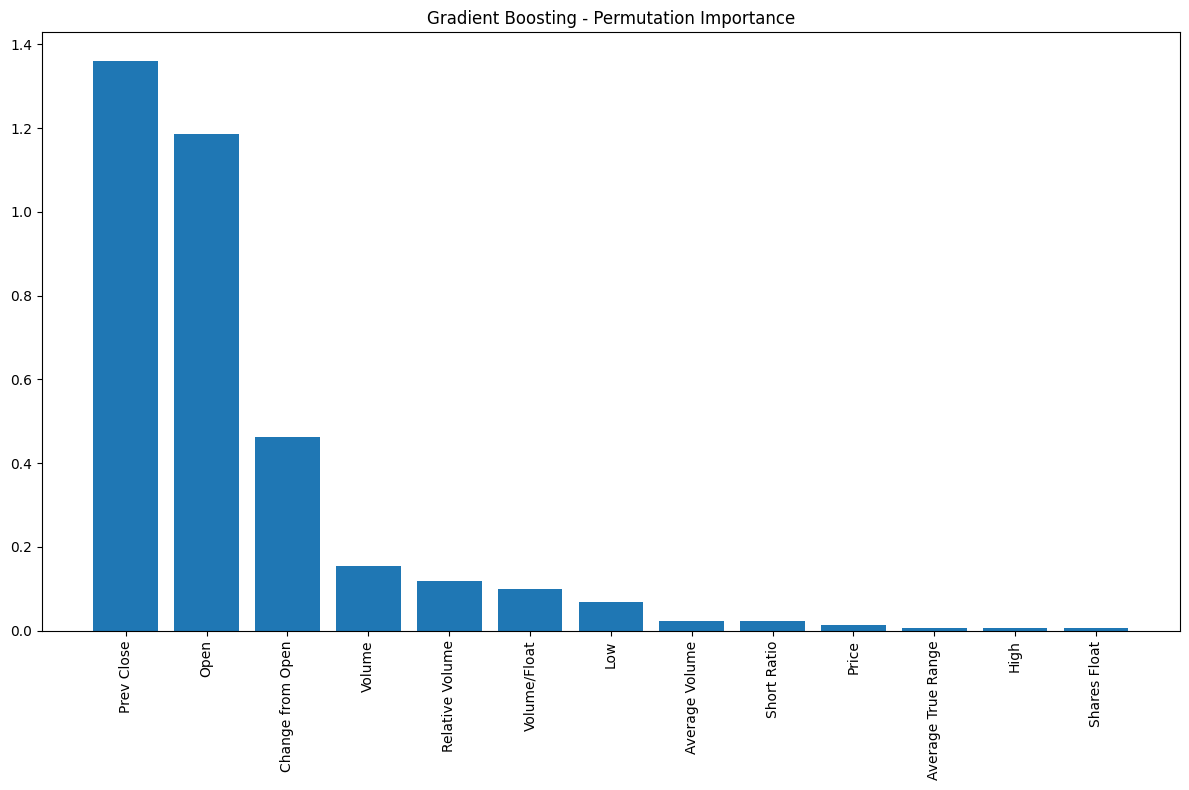


Gradient Boosting - Built-in Feature Importances:
               feature  importance
3     Change from Open    0.438606
12        Volume/Float    0.199273
6               Volume    0.134995
5      Relative Volume    0.111502
4       Average Volume    0.020425
7           Prev Close    0.017361
1          Short Ratio    0.017361
11               Price    0.013803
0         Shares Float    0.012911
8                 Open    0.012820
2   Average True Range    0.008900
10                 Low    0.006297
9                 High    0.005745


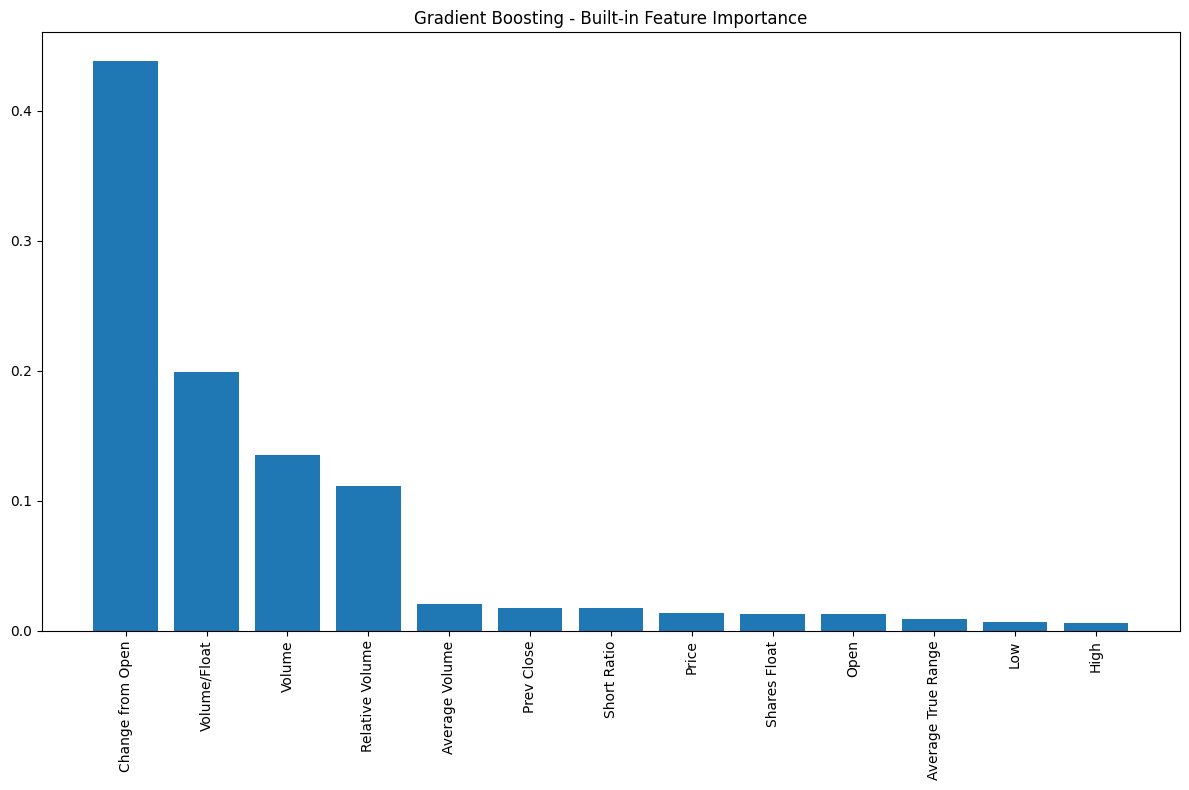

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)

# Calculate permutation importance
gb_perm_importance = permutation_importance(gb, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create and sort feature importance DataFrame for permutation importance
gb_feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': gb_perm_importance.importances_mean
})
gb_feature_importance = gb_feature_importance.sort_values('importance', ascending=False)

# Print Gradient Boosting permutation importances
print("\nGradient Boosting - Permutation Importance:")
print(gb_feature_importance)

# Visualize Gradient Boosting permutation importances
plt.figure(figsize=(12, 8))
plt.bar(gb_feature_importance['feature'], gb_feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Gradient Boosting - Permutation Importance')
plt.tight_layout()
plt.show()

# Get built-in feature importances
gb_builtin_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': gb.feature_importances_
})
gb_builtin_importance = gb_builtin_importance.sort_values('importance', ascending=False)

# Print Gradient Boosting built-in feature importances
print("\nGradient Boosting - Built-in Feature Importances:")
print(gb_builtin_importance)

# Visualize Gradient Boosting built-in feature importances
plt.figure(figsize=(12, 8))
plt.bar(gb_builtin_importance['feature'], gb_builtin_importance['importance'])
plt.xticks(rotation=90)
plt.title('Gradient Boosting - Built-in Feature Importance')
plt.tight_layout()
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

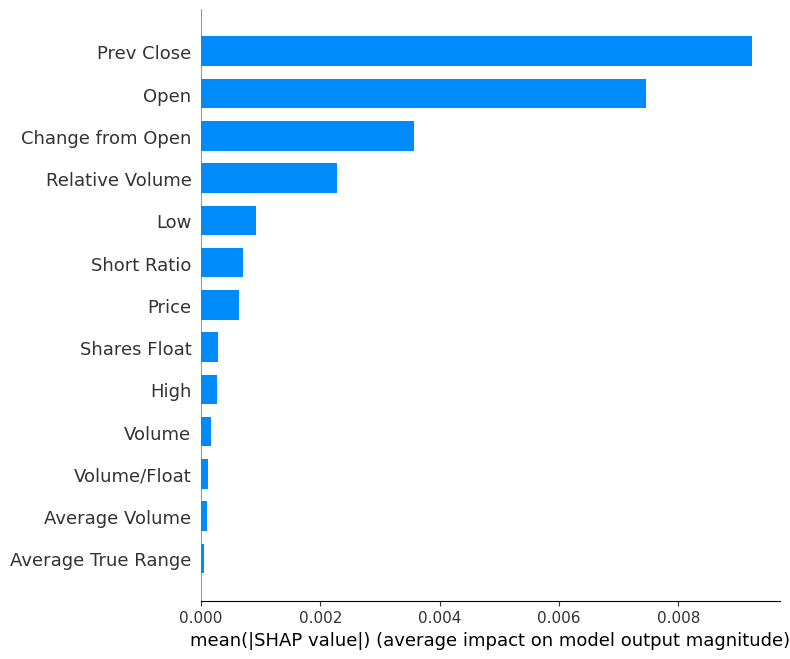

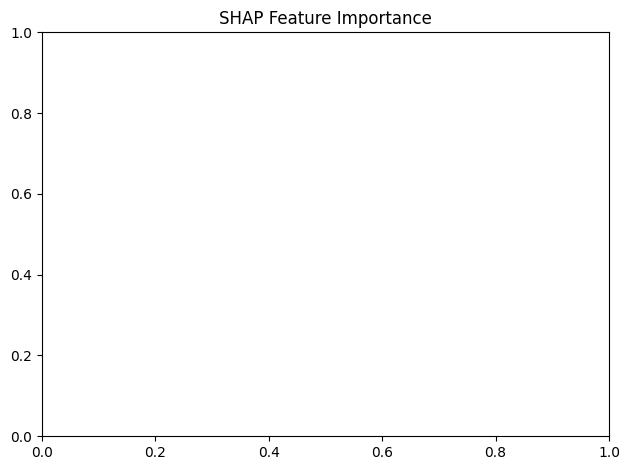

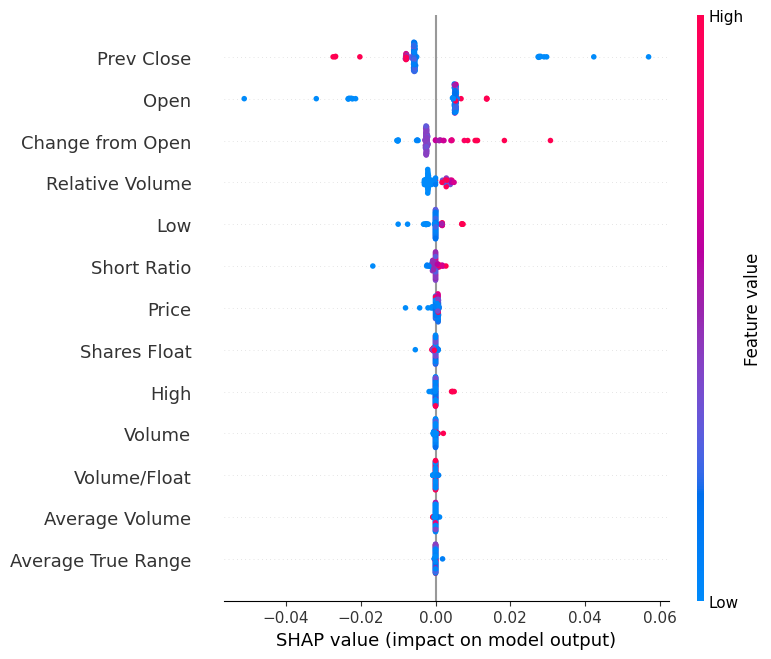

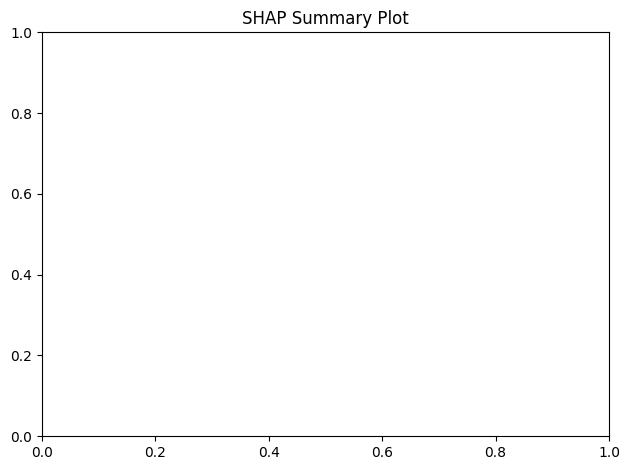

<Figure size 1200x800 with 0 Axes>

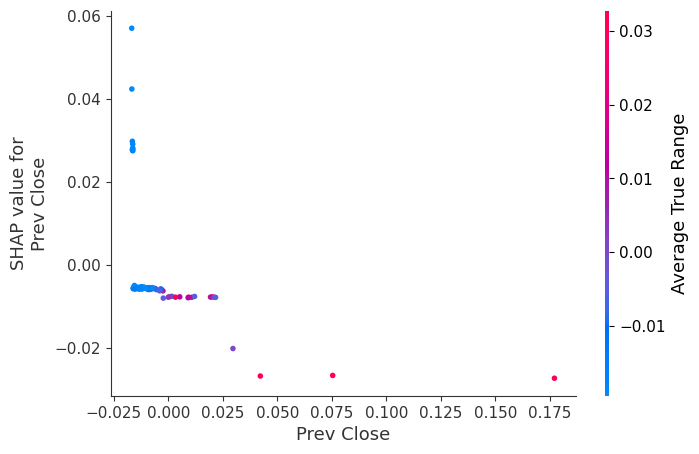

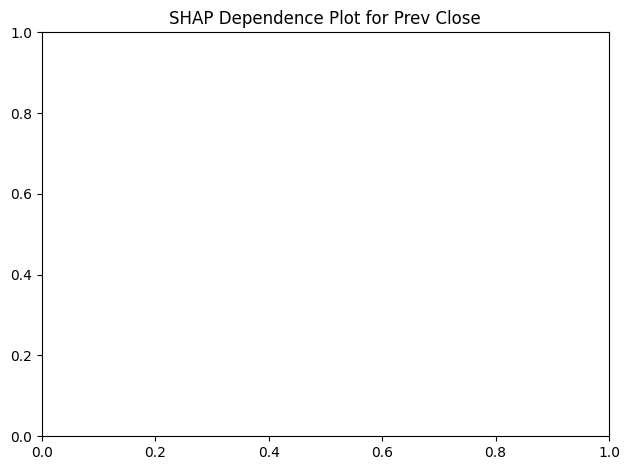

<Figure size 1200x800 with 0 Axes>

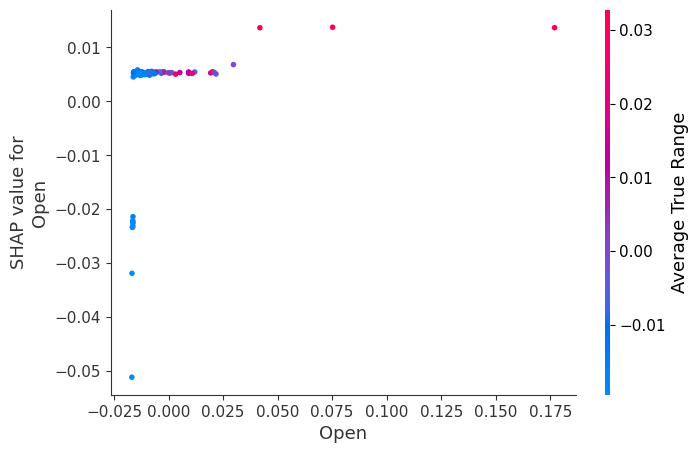

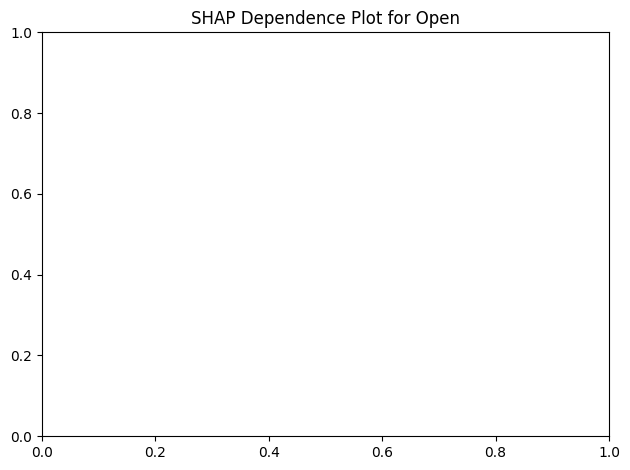

<Figure size 1200x800 with 0 Axes>

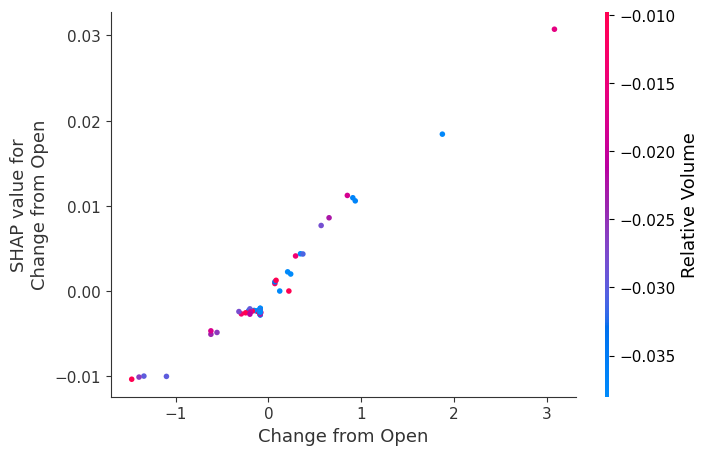

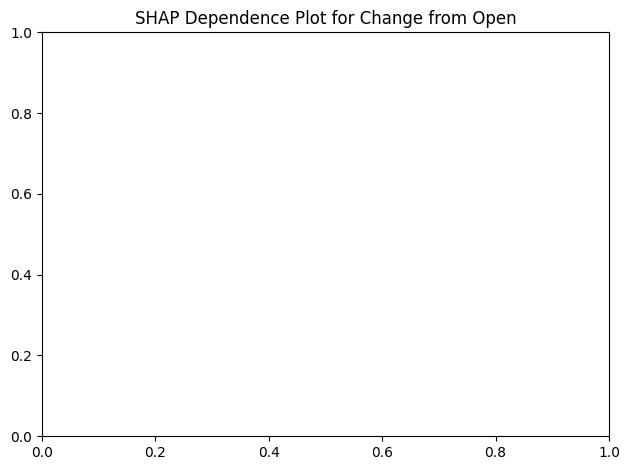

In [ ]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP KernelExplainer
explainer = shap.KernelExplainer(gb.predict, shap.sample(X_test_scaled, 100))

# Calculate SHAP values for a subset of the test data
shap_values = explainer.shap_values(X_test_scaled[:100], nsamples=100)

# Summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], plot_type="bar", feature_names=feature_columns)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()

# Detailed SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=feature_columns)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()

# SHAP dependence plots for top features
top_features = gb_feature_importance['feature'].head(3).tolist()
for feature in top_features:
    plt.figure(figsize=(12, 8))
    shap.dependence_plot(feature, shap_values, X_test_scaled[:100], feature_names=feature_columns)
    plt.title(f'SHAP Dependence Plot for {feature}')
    plt.tight_layout()
    plt.show()